# **1.환경설정**
**분석에 사용할 라이브러리 불러오기 및 구글 드라이브 연결**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. 데이터 확인**
**데이터 불러온 후 데이터 형태 확인**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/[러닝스푼즈] CRM 프로젝트/[러닝스픈즈] CRM머신러닝 프로젝트_3기/6주차 /Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# 전체 데이터 수 확인
df.shape

(541909, 8)

In [ ]:
# 전체적인 데이터 수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **3. 데이터 클렌징**


### 3.1 얼마나 많은 NULL이 있는지 확인 후 사용할 수 없는 NULL 처리


In [ ]:
# 전체의 약 25%가 null 이 있는 케이스
df.isnull().sum().sum() / df.shape[0]

0.2519500506542611

In [ ]:
# description, customerid의 null 값이 있음
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# 리텐션을 구할 때 유저id가 없으면 쓸 수 없으니 모두 제거
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### 3.2 중복 데이터 확인 후 처리

In [ ]:
# 중복되는 로우 확인
df.duplicated().sum()

5225

In [ ]:
# 중복 데이터 직접 확인
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
# 중복 데이터 직접 확인
df[(df['CustomerID']==17908.0) & (df['InvoiceNo']==536409) & (df['StockCode']==21866)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


In [ ]:
# 중복 데이터 삭제 후 데이터 확인
df = df[~df.duplicated()]
df.shape

(401604, 8)

In [ ]:
# 유저id가 null인 것 직접 확인
df[df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country




### 3.3 그 외 비지니스 상황에 맞게 데이터 처리

In [ ]:
# 데이터를 전체적으로 봄
# 마이너스 값 - 환불, 캔슬 등이 포함 (구매라고 볼 수 없음)
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# 주문 갯수가 0 이하인 데이터 직접 확인
df[df['Quantity']<=0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
# 금액이 0 이하인 데이터 직접 확인
df[df['UnitPrice']<=0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [ ]:
# 리턴은 구매가 아니므로 확실한 구매 레코드만 킵
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 환불 및 사은품 데이터 제거 후 확인
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# **4. 이상치 제거**
**max, min 값이 괜찮은가**

박스플롯이나 퀀타일로 얼마나 벗어났는지 확인 후
비지니스적으로 의사결정을 내려야 함

여기서는 우선 괜찮다고 가정하고 감

# **5. EDA**

In [ ]:
# 유니크한 주문건 수
df.InvoiceNo.nunique()

18532

In [ ]:
# 전체 유니크한 아이템 갯수
df.StockCode.nunique()

3665

In [ ]:
# 유니크유저 수
df.CustomerID.nunique()

4338

In [ ]:
# 탑10 가장 많이 주문에 포함된 상품 
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

In [ ]:
# 인보이스 min, max 날짜 및 월별 인보이스 수 확인
print('시작일: ',df.InvoiceDate.min())
print('종료일: ',df.InvoiceDate.max())
print('')
pd.DatetimeIndex(df['InvoiceDate']).to_period('M').value_counts()

시작일:  2010-12-01 08:26:00
종료일:  2011-12-09 12:50:00



2011-11    63168
2011-10    48793
2011-09    39669
2011-05    28073
2011-06    26926
2011-03    26870
2011-08    26790
2011-07    26580
2010-12    25670
2011-04    22433
2011-01    20988
2011-02    19706
2011-12    17026
Freq: M, Name: InvoiceDate, dtype: int64

In [ ]:
# 주문 국적별 확인
# 영국 리테일서비스라 영국 국적이 90% 이상
pd.concat([df.Country.value_counts(), df.Country.value_counts(normalize = True)],axis = 1).head(10)

,Country,Country
United Kingdom,349203,0.889254
Germany,9025,0.022982
France,8326,0.021202
EIRE,7226,0.018401
Spain,2479,0.006313
Netherlands,2359,0.006007
Belgium,2031,0.005172
Switzerland,1841,0.004688
Portugal,1453,0.003700
Australia,1181,0.003007


# **6. 리텐션 계산**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 리텐션을 위해 유저 구매 정보를 주문단위로  요약 
df['sales']= df['UnitPrice'] * df['Quantity']

df.groupby(['InvoiceNo','InvoiceDate','CustomerID','Country']).agg(
    Stock_cnt = ('StockCode','count'),
    Sales = ('sales', 'sum')
)
# 리텐션의 종류 중 무엇을 선택할 것인가?


,,,,Stock_cnt,Sales
InvoiceNo,InvoiceDate,CustomerID,Country,,
536365,2010-12-01 08:26:00,17850.0,United Kingdom,7,139.12
536366,2010-12-01 08:28:00,17850.0,United Kingdom,2,22.20
536367,2010-12-01 08:34:00,13047.0,United Kingdom,12,278.73
536368,2010-12-01 08:34:00,13047.0,United Kingdom,4,70.05
536369,2010-12-01 08:35:00,13047.0,United Kingdom,1,17.85
...,...,...,...,...,...
581583,2011-12-09 12:23:00,13777.0,United Kingdom,2,124.60
581584,2011-12-09 12:25:00,13777.0,United Kingdom,2,140.64
581585,2011-12-09 12:31:00,15804.0,United Kingdom,21,329.05


In [ ]:
# 컬럼 생성
# 1. 총가격(Amount) = 물건갯수*가격
# 2. month_year = 인보이스 날짜에서 년도와 월만 추출
df['Amount'] = df['Quantity']*df['UnitPrice']
df['month_year'] = pd.DatetimeIndex(df['InvoiceDate']).to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,Amount,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12


In [ ]:
# 나라별 유저별로 월별 얼마를 쓰고 몇개를 구매했는지 썸머리
# (드물지만) 나라가 다를때 유저id가 같은 경우가 있을 수도 있어서 나라와 유저id 두개를 축으로 잡고 계산
df_summary = df.groupby(by=['month_year','CustomerID','Country']).agg(
    total_amt = ('Amount','sum'),
    total_qty = ('Quantity','sum')
).reset_index()
df_summary.head()

,month_year,CustomerID,Country,total_amt,total_qty
0,2010-12,12347.0,Iceland,711.79,319
1,2010-12,12348.0,Finland,892.80,1254
2,2010-12,12370.0,Austria,277.20,51
3,2010-12,12370.0,Cyprus,1587.07,916
4,2010-12,12377.0,Switzerland,1001.52,604


In [ ]:
# 가정: 데이터에서의 첫 주문이 유저의 생애 첫 주문
# 유저별 첫 주문 테이블 생성
join_info = df.groupby(['CustomerID','Country']).agg(
    InvoiceDate=('InvoiceDate','min')
).reset_index()

join_info['join_month_year'] = pd.DatetimeIndex(join_info['InvoiceDate']).to_period('M')

join_info.head()

,CustomerID,Country,InvoiceDate,join_month_year
0,12346.0,United Kingdom,2011-01-18 10:01:00,2011-01
1,12347.0,Iceland,2010-12-07 14:57:00,2010-12
2,12348.0,Finland,2010-12-16 19:09:00,2010-12
3,12349.0,Italy,2011-11-21 09:51:00,2011-11
4,12350.0,Norway,2011-02-02 16:01:00,2011-02


In [ ]:
# 썸머리 테이블에 첫 주문일자 조인
df_final = pd.merge(df_summary, join_info, on = ['CustomerID','Country'], how = 'inner')
df_final.head()

,month_year,CustomerID,Country,total_amt,total_qty,InvoiceDate,join_month_year
0,2010-12,12347.0,Iceland,711.79,319,2010-12-07 14:57:00,2010-12
1,2011-01,12347.0,Iceland,475.39,315,2010-12-07 14:57:00,2010-12
2,2011-04,12347.0,Iceland,636.25,483,2010-12-07 14:57:00,2010-12
3,2011-06,12347.0,Iceland,382.52,196,2010-12-07 14:57:00,2010-12
4,2011-08,12347.0,Iceland,584.91,277,2010-12-07 14:57:00,2010-12


In [ ]:
# 조인 년월, 구매 년월별 유저 수 계산
# 2010년 12월 가입 유저 중 2010년 12월에 구매한 유저는 885명, 2011년 1월에 구매한 유저는 324명, ...
cohorts = df_final.groupby(by=['join_month_year','month_year']).agg(
    start_customers = ('CustomerID','nunique')
).reset_index()
cohorts.head()

,join_month_year,month_year,start_customers
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,319


In [ ]:
# Month 0, Month 1, Month 2, .. 등 기간 생성
# 첫번째 코호트에 N번의 기간이 있으면 두번째에는 N-1번, 세번째 N-2번, ... 마지막 기간이 1번 생성되어야 함
# 예: 2010년 12월 가입 유저는 2011년 12월까지 최대 13번을 살 수 있음
each_period = cohorts['join_month_year'].value_counts().sort_index()
each_period

2010-12    13
2011-01    12
2011-02    11
2011-03    10
2011-04     9
2011-05     8
2011-06     7
2011-07     6
2011-08     5
2011-09     4
2011-10     3
2011-11     2
2011-12     1
Freq: M, Name: join_month_year, dtype: int64

In [ ]:
# 코호트 기간을 알맞게 할당
# 2010년 12월 가입 유저는 2010년 12월에 구매를 하면 Month 0, 2011년 1월에 구매를 하면 Month 1, ...
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['cohort_period']=cohortperiod
cohorts.head(20)

,join_month_year,month_year,start_customers,cohort_period
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,319,4
5,2010-12,2011-05,352,5
6,2010-12,2011-06,321,6
7,2010-12,2011-07,309,7
8,2010-12,2011-08,313,8
9,2010-12,2011-09,350,9


In [ ]:
# 첫구매년월, 첫구매유저수 인덱스 만듦
cohorts.set_index(['join_month_year','cohort_period'],inplace=True)
cohorts

month_year  start_customers
join_month_year cohort_period                            
2010-12         0                2010-12              885
                1                2011-01              324
                2                2011-02              286
                3                2011-03              340
                4                2011-04              319
...                                  ...              ...
2011-10         1                2011-11               86
                2                2011-12               41
2011-11         0                2011-11              323
                1                2011-12               36
2011-12         0                2011-12               41

[91 rows x 2 columns]

In [ ]:
# 피봇팅
cohorts=cohorts['start_customers'].unstack(1)
cohorts

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month_year,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,319.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,119.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,381.0,71.0,71.0,108.0,102.0,93.0,95.0,105.0,95.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,302.0,64.0,61.0,63.0,59.0,68.0,64.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,65.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,244.0,43.0,39.0,65.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 각 셀을 코호트별 첫구매유저수로 나눠줌
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month_year,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.360452,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.285372,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186352,0.186352,0.283465,0.267717,0.244094,0.249344,0.275591,0.249344,0.304462,0.068241,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.211921,0.201987,0.208609,0.195364,0.225166,0.211921,0.258278,0.072848,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.228873,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.176230,0.159836,0.266393,0.229508,0.331967,0.094262,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_period', ylabel='join_month_year'>

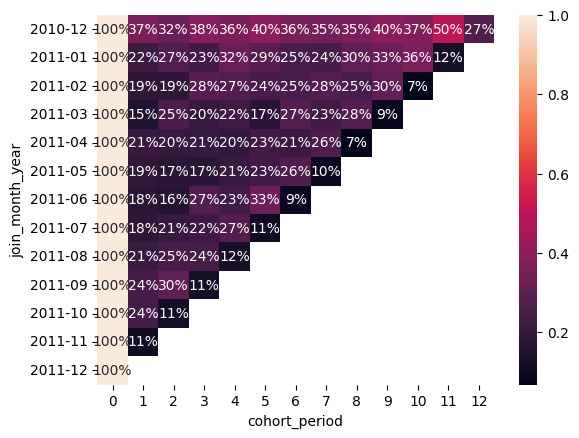

In [ ]:
# 시각화
sns.heatmap(data=user_retention, annot = True, fmt = '.0%')